# Principal Component Analysis

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [4]:
cancer.keys()
#print(cancer['DESCR'])

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [26]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
#(['DESCR', 'data', 'feature_names', 'target_names', 'target'])

In [27]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## PCA Visualization

As we've noticed before it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

In [30]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
scaled_data = scaler.transform(df)

Standardizing is computed via the equation $x_{standardized} = \frac{x - \mu_x}{\sigma_x}$,
where $\mu$ is the sample mean, and $\sigma$ the standard deviation respectively.

**It's important to note that the same transformation is applied to the training and the test set. That has the consequence that usually the mean of the test data is not zero after scaling.**

```
trainDataStandardized = (trainData - mean(trainData)) / sd(trainData)
testDataStandardized = (testData - mean(trainData)) / sd(trainData)
```

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the PCA object.

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=2)

In [36]:
pca.fit(scaled_data)

PCA(copy=True, n_components=2, whiten=False)

Now we can transform this data to its first 2 principal components.

In [37]:
x_pca = pca.transform(scaled_data)

In [38]:
scaled_data.shape

(569, 30)

In [39]:
x_pca.shape

(569, 2)

Great! We've reduced 30 dimensions to just 2! Let's plot these two dimensions out!

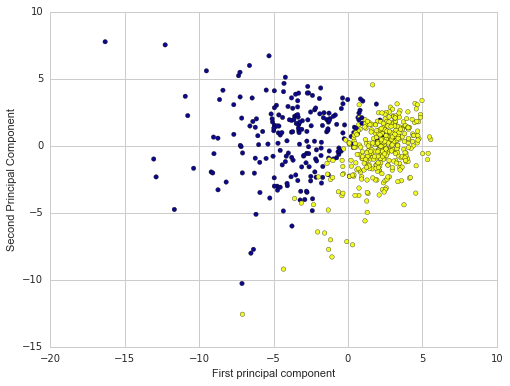

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

## Interpreting the components 

Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In [55]:
pca.components_

array([[-0.21890244, -0.10372458, -0.22753729, -0.22099499, -0.14258969,
        -0.23928535, -0.25840048, -0.26085376, -0.13816696, -0.06436335,
        -0.20597878, -0.01742803, -0.21132592, -0.20286964, -0.01453145,
        -0.17039345, -0.15358979, -0.1834174 , -0.04249842, -0.10256832,
        -0.22799663, -0.10446933, -0.23663968, -0.22487053, -0.12795256,
        -0.21009588, -0.22876753, -0.25088597, -0.12290456, -0.13178394],
       [ 0.23385713,  0.05970609,  0.21518136,  0.23107671, -0.18611302,
        -0.15189161, -0.06016536,  0.0347675 , -0.19034877, -0.36657547,
         0.10555215, -0.08997968,  0.08945723,  0.15229263, -0.20443045,
        -0.2327159 , -0.19720728, -0.13032156, -0.183848  , -0.28009203,
         0.21986638,  0.0454673 ,  0.19987843,  0.21935186, -0.17230435,
        -0.14359317, -0.09796411,  0.00825724, -0.14188335, -0.27533947]])

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:

In [56]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

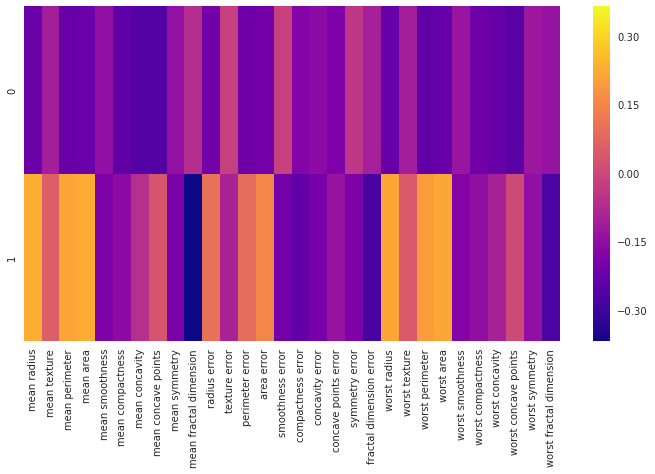

In [57]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

# Manifold Learning

One weakness of PCA is that it cannot detect non-linear features.  A set
of algorithms known as *Manifold Learning* have been developed to address
this deficiency.

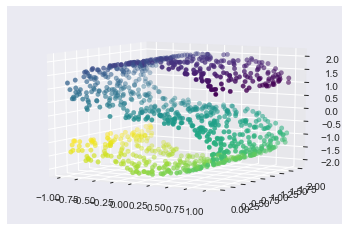

In [6]:
from sklearn.datasets import make_s_curve
X, y = make_s_curve(n_samples=1000)

from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')

ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y, cmap="viridis")
ax.view_init(10, -60);

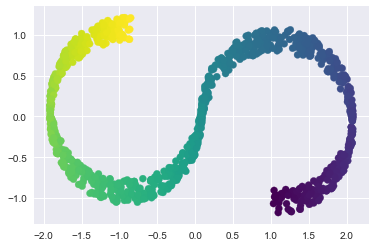

In [7]:
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis")

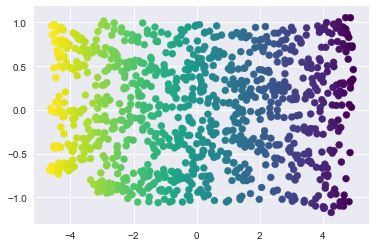

In [8]:
from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=15, n_components=2)
X_iso = iso.fit_transform(X)
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=y, cmap="viridis")

We can see that PCA fails to discover the underlying data orientation 
whereas the Manifold can.

# Manifold learning on the digits data

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()

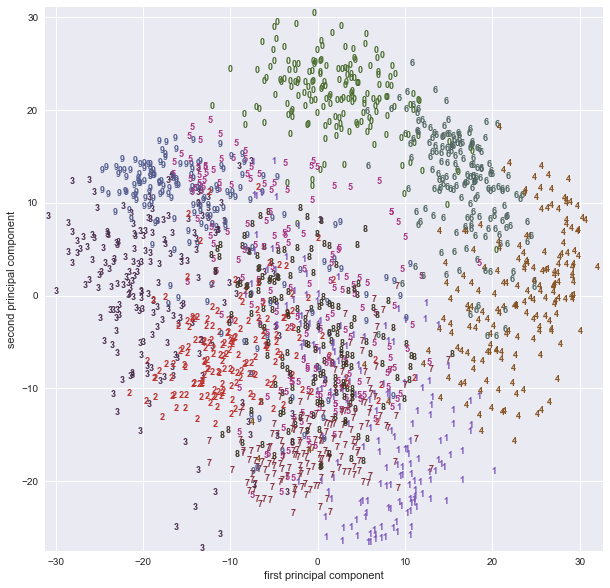

In [10]:
# build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)
# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max() + 1)
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("first principal component")
plt.ylabel("second principal component");

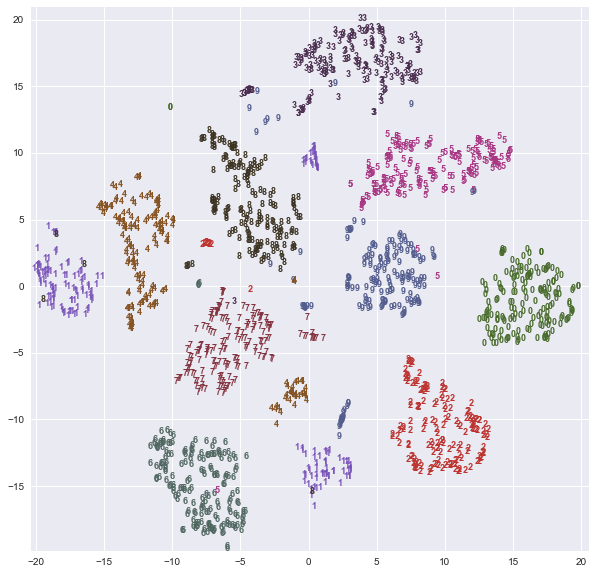

In [11]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method:
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})

t-sne as a nonlinear techinque can provide much better visualizations than PCA.